c:\Users\walla\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] O sistema não pode encontrar o arquivo especificado
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\walla\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 199, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\walla\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\walla\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\walla\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi

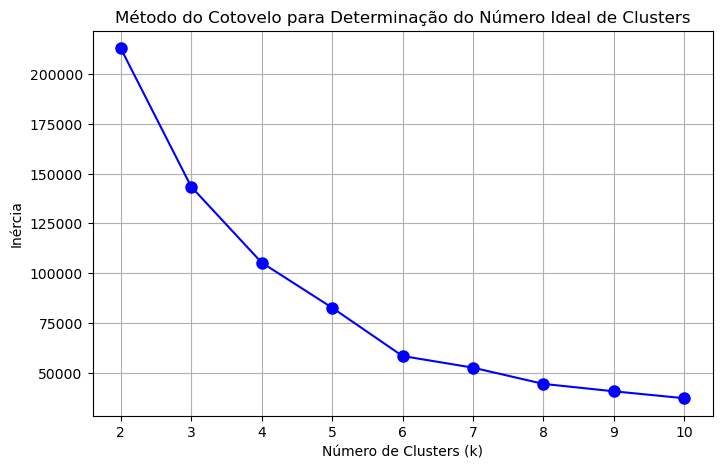

c:\Users\walla\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


           Gender        Age  Annual Income (k$)  Spending Score (1-100)  Size
Cluster                                                                       
0        0.568182  56.340909           53.704545               49.386364    44
1        0.538462  32.692308           86.538462               82.128205    39
2        0.590909  44.318182           25.772727               20.272727    22
3        0.441176  41.647059           88.735294               16.764706    34
4        0.631579  27.315789           57.500000               48.447368    38
5        0.608696  25.521739           26.304348               78.565217    23


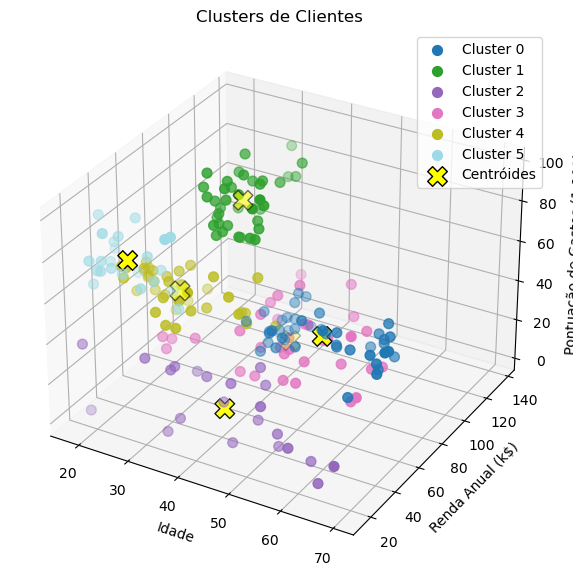

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

data = pd.read_csv('Mall_Customers.csv')

data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})

X = data[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

inertia = []
silhouette_scores = []
K = range(2, 11)  
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-', markersize=8)
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo para Determinação do Número Ideal de Clusters')
plt.xticks(K)
plt.grid(True)
plt.show()

ideal_clusters = K[silhouette_scores.index(max(silhouette_scores))]

num_clusters = int(input(f"Quantos clusters você deseja criar? (Sugerido: {ideal_clusters}) "))

kmeans = KMeans(n_clusters=num_clusters, random_state=0)
data['Cluster'] = kmeans.fit_predict(X)

centroids = kmeans.cluster_centers_

cluster_summary = data.groupby('Cluster').mean(numeric_only=True)[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
cluster_summary['Size'] = data['Cluster'].value_counts().sort_index()
print(cluster_summary)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

colors = plt.get_cmap('tab20', num_clusters)

for cluster in range(num_clusters):
    ax.scatter(
        data.loc[data['Cluster'] == cluster, 'Age'],
        data.loc[data['Cluster'] == cluster, 'Annual Income (k$)'],
        data.loc[data['Cluster'] == cluster, 'Spending Score (1-100)'],
        s=50, c=[colors(cluster)], label=f'Cluster {cluster}'
    )

ax.scatter(centroids[:, 1], centroids[:, 2], centroids[:, 3], s=200, c='yellow', marker='X', edgecolor='black', label='Centróides')


ax.set_xlabel('Idade')
ax.set_ylabel('Renda Anual (k$)')
ax.set_zlabel('Pontuação de Gastos (1-100)')
ax.set_title('Clusters de Clientes')
ax.legend()
plt.show()
